#Practical 1

In [17]:
!pip install requests beautifulsoup4

In [19]:
from urllib.parse import urlparse  
url= '''https://www.google.com/search?q=pookie+&sca_esv=a24eb7beebb63ee4&ei=zrAHaLHLJ_i1vr0P3bGB4AU&ved=0ahUKEwix6vTM9euMAxX4mq8BHd1YAFwQ4dUDCBI&uact=5&oq=pookie+&gs_lp=Egxnd3Mtd2l6LXNlcnAaAhgBIgdwb29raWUgMggQABiABBixAzIOEAAYgAQYkQIYigUYiwMyCBAAGIAEGIsDMgsQABiABBiRAhiKBTILEAAYgAQYkQIYigUyCxAAGIAEGJECGIoFMgUQABiABDIIEAAYgAQYsQMyCBAAGIAEGLEDMgUQABiABEiiCFCzA1izA3ACeAGQAQCYAa8BoAGvAaoBAzAuMbgBA8gBAPgBAZgCA6AC1gHC
AgoQABiwAxjWBBhHwgINEAAYgAQYsAMYQxiKBcICDxAAGIAEGLADGEMYigUYCpgDAIgGAZAGCpIHAzIuMaAHwwWyBwMwLjG4B74B&sclient=gws-wiz-serp'''
parsed_url = urlparse(url)  
print("Parsed URL Components:")  
print("Scheme: ",parsed_url.scheme)  
print("Netlocation: ",parsed_url.netloc)  
print("Path: ",parsed_url.path)  
print("Query: ",parsed_url.query) 

Parsed URL Components:
Scheme:  https
Netlocation:  www.google.com
Path:  /search
Query:  q=pookie+&sca_esv=a24eb7beebb63ee4&ei=zrAHaLHLJ_i1vr0P3bGB4AU&ved=0ahUKEwix6vTM9euMAxX4mq8BHd1YAFwQ4dUDCBI&uact=5&oq=pookie+&gs_lp=Egxnd3Mtd2l6LXNlcnAaAhgBIgdwb29raWUgMggQABiABBixAzIOEAAYgAQYkQIYigUYiwMyCBAAGIAEGIsDMgsQABiABBiRAhiKBTILEAAYgAQYkQIYigUyCxAAGIAEGJECGIoFMgUQABiABDIIEAAYgAQYsQMyCBAAGIAEGLEDMgUQABiABEiiCFCzA1izA3ACeAGQAQCYAa8BoAGvAaoBAzAuMbgBA8gBAPgBAZgCA6AC1gHCAgoQABiwAxjWBBhHwgINEAAYgAQYsAMYQxiKBcICDxAAGIAEGLADGEMYigUYCpgDAIgGAZAGCpIHAzIuMaAHwwWyBwMwLjG4B74B&sclient=gws-wiz-serp


#Practical2 web graph

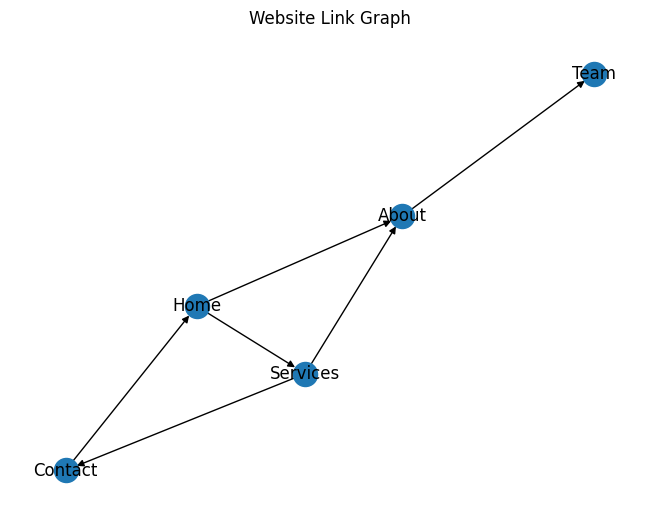

In [22]:
import networkx as nx  
import matplotlib.pyplot as plt  
# create a directed graph  
G = nx.DiGraph()  
# Add edges representing links between web pages  
edges = [  
    ("Home","About"),  
    ("Home", "Services"),  
    ("About","Team"),  
    ("Services","Contact"),  
    ("Contact","Home"),  
    ("Services","About")  
]  
G.add_edges_from(edges)  
#Draw the graph  
pos = nx.spring_layout(G) #positions from all nodes  
nx.draw(G,pos,with_labels = True, arrows=True)  
plt.title("Website Link Graph")  
plt.show()

In [4]:
#Pr3

In [25]:
import requests  
from bs4 import BeautifulSoup  
  
def simple_crawler(keyword):  
    url = f"https://en.wikipedia.org/wiki/Wikipedia:Special:Search={keyword}"  
    response = requests.get(url)  
    soup = BeautifulSoup(response.text, 'html.parser')  
    for link in soup.find_all('a',href=True):  
        if link['href'].startswith('/wiki/') and ':' not in link['href']:  
            print(f"https://en.wikipedia.org{link['href']}")  
keyword = input("Enter a keyword to search: ")  
simple_crawler(keyword)

Enter a keyword to search:  beauty


https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Case_sensitivity


In [6]:
#Pr4

In [27]:
import requests  
def fetch_page(url):  
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}  
    try:  
        response = requests.get(url, headers=headers)  
        response.raise_for_status() # Raise an HTTPError for bad responses  
        return response.text  
    except requests.exceptions.HTTPError as e:  
        print(f"HTTP error occurred: {e}")  
    except Exception as e:  
        print(f"An error occurred: {e}")  
url=" https://en.wikipedia.org/wiki/YouTube" # Replace with the target URL  
page_content = fetch_page(url)  
if page_content:  
    print(page_content)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>YouTube - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-cus

In [10]:
#Pr5

In [33]:
import networkx as nx  
G = nx.DiGraph()  
G.add_edges_from([(1,2), (1,3), (2,4), (3,4), (4,4)])  
# G.add_edges_from([('p','q'), ('p','s'), ('p','r'), ('q','r'), ('r','p'), ('s','s')])  
authority_score, hub_score = nx.hits(G)  
print(f"Authority Scores: {authority_score}")  
print(f"Hub Scores: {hub_score}")

Authority Scores: {1: 3.700743415417188e-17, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0.3333333333333333}
Hub Scores: {1: -0.0, 2: -0.0, 3: 1.1102230246251565e-16, 4: 1.0}


In [12]:
#Pr6

Node -> A:0.1999690383608587
Node -> B:0.17401971598239518
Node -> C:0.17401971598239518
Node -> D:0.1260112456567459
Node -> E:0.1260112456567459
Node -> F:0.1999690383608587


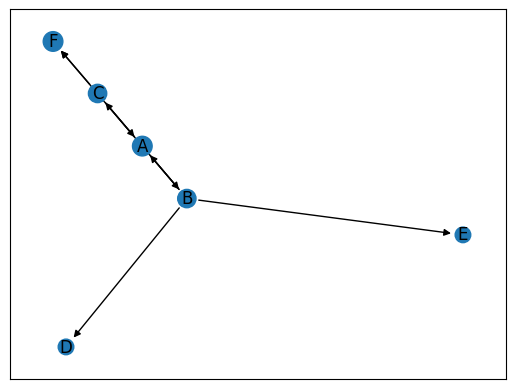

In [50]:
# Page rank using NetworkX  
import networkx as nx  
import matplotlib.pyplot as plt  
G = nx.DiGraph()  
G.add_edges_from([  
    ('A','B'),('A','C'),('B','A'),('B','D'),('B','E'),('B','F'),  
    ('C','A'),('C','F')])  
pr = nx.pagerank(G,alpha=0.85)  
for node, rank in pr.items():  
    print(f"Node -> {node}:{rank}")  
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos,node_size=[pr[node]*1000 for node in G.nodes()])  
nx.draw_networkx_edges(G, pos)  
nx.draw_networkx_labels(G, pos)  
plt.show()

In [14]:
#Pr7

In [1]:
!pip install sumy 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import nltk  
nltk.download('punkt_tab')  
  
from sumy.parsers.plaintext import PlaintextParser  
from sumy.nlp.tokenizers import Tokenizer  
from sumy.summarizers.lex_rank import LexRankSummarizer  
  
def summarize_text(text, num_sentences=3):  
    # Initialize the parser with the provided text  
    parser = PlaintextParser.from_string(text, Tokenizer("english"))  
    # Initialize the LexRankSummarizer  
    summarizer = LexRankSummarizer()  
    summary = summarizer(parser.document, num_sentences)  
    summarized_text = ""  
    for sentence in summary:  
        summarized_text += str(sentence) + " "  
    return summarized_text  
text = '''The narrator explains that Kamban's poem begins by describing the land of Kosala,  
    where the story takes place.He describes the people at work on the land, and the  
    animals that live among them. The capital city, Ayodhya, is a fabulous city ruled    
over by King Dasaratha. Though Dasaratha is a compassionate and well-loved king, he  
laments that he's childless. One day, he mentions to his mentor that he has no sons  
to succeed him,  
    and asks his mentor for help.'''  
summary = summarize_text(text)  
print(summary) 


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\NandanaM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


LookupError: NLTK tokenizers are missing or the language is not supported.
Download them by following command: python -c "import nltk; nltk.download('punkt')"
Original error was:

**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/hindi/[0m

  Searched in:
    - 'C:\\Users\\NandanaM/nltk_data'
    - 'C:\\Users\\NandanaM\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\NandanaM\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\NandanaM\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\NandanaM\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
#Prct 8

In [13]:
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install scikit-surprise --no-binary :all:

Found existing installation: numpy 2.0.1
Uninstalling numpy-2.0.1:
  Successfully uninstalled numpy-2.0.1


You can safely remove it manually.
You can safely remove it manually.


   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
    --------------------------------------- 0.3/14.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.6 MB 1.2 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/14.6 MB 1.5 MB/s eta 0:00:10
   -- ------------------------------------- 1.0/14.6 MB 1.5 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/14.6 MB 1.5 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/14.6 MB 1.5 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/14.6 MB 1.5 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/14.6 MB 1.7 MB/s eta 0:00:08
   ------- ------------------------------

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [196 lines of output]
       ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
       ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
       ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
       ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
       ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
       --------------- ------------------------ 0.5/1.4 MB 2.1 MB/s eta 0:00:01
       ------------------------------ --------- 1.0/1.4 MB 1.9 MB/s eta 0:00:01
       ---------------------------------------- 1.4/1.4 MB 1.9 MB/s eta 0:00:00
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'done'
   

In [14]:
pip install pandas scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [155 lines of output]
  C:\Users\NandanaM\AppData\Local\Temp\pip-build-env-0h0qwmu5\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
  !!
  
          ********************************************************************************
          Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
  
          By 2026-Feb-18, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    corresp(dist, value, root_dir)
  C:\Users\NandanaM\AppData\Local\Temp\pip

In [15]:
import pandas as pd  

In [16]:
from surprise import Dataset,Reader

ModuleNotFoundError: No module named 'surprise'